# Predicting the Car Accident Severity in Seattle

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Exploratory Data Analysis](#analysis)
* [Predictive Modeling](#modeling)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction<a name="introduction"></a>

Car accidents are a common yet avoidable problem in the United States. The Association for Safe International Road Travel (ASIRT) stated that more than 38,000 people die every year in crashes on US roadways with an economic impact of $871 billion. In Washington alone, car accidents occur every four minutes. Car accidents can be caused by, but not limited to, speeding, driving under influence, weather conditions, and road conditions. However, while these conditions are known to cause car accidents, can these conditions help determine the severity of each car accident? If these factors were correlated to the severity of car accidents, a predictive model can be made to help predict car accident severity. 

### Problem

The dataset contains multiple factors that could contribute to the car accident severity in Seattle. The report aims to predict the car accident severity based on past reports. 

### Business Interest

Transport organizations and the Seattle Department of Transportation can use these findings to help understand the common factors that influence the severity of car accidents. Law enforcement can also use this report to help them expect how severe a recent car accident is.

## Data <a href="data"></a>

The dataset is provided by by the Seattle Police Dpartment via IBM. The dataset contains multiple factors along with the severity code that can help predict the severity of a car accident. While additional datasets can be used, the amount of information in this dataset suffices the task for this problem.

### Import python data analysis modules

In [50]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

In [51]:
csv_file = "Data-Collisions.csv"

In [52]:
df = pd.read_csv(csv_file)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [53]:
df.shape

(194673, 38)

### Data Cleaning

I checked the features in the dataset to determine what can be taken out.

In [54]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Let's remove the duplicated features and features that is kept for record keeping.

Also, let's remove the PERSONCOUNT, PEDCOUNT, PEDCYLCOUN, and VEHCOUNT since the SDOT_COLNUM describes the collision in a codified manner.

In [55]:
df_clean = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
                    'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
                    'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
                    'COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 
                    'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE',
                    'SDOT_COLDESC', 'INATTENTIONIND',
                    'PEDROWNOTGRNT','ST_COLDESC', 'SPEEDING','SDOTCOLNUM',
                    'SEGLANEKEY', 'CROSSWALKKEY'], axis=1)
df_clean.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2013/03/27 00:00:00+00,11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,2006/12/20 00:00:00+00,16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,2004/11/18 00:00:00+00,14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,2013/03/29 00:00:00+00,11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,2004/01/28 00:00:00+00,11,0,Raining,Wet,Daylight,10,N


Let's check the datatype for each feature and check the shape of the dataset

In [56]:
df_clean.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
INCDATE          object
SDOT_COLCODE      int64
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
HITPARKEDCAR     object
dtype: object

In [57]:
df_clean.shape

(194673, 12)

It is a good idea to find any NaN values. For this project, I decided to remove the NaN values.

In [58]:
df_clean.isna().sum()

SEVERITYCODE       0
X               5334
Y               5334
ADDRTYPE        1926
INCDATE            0
SDOT_COLCODE       0
UNDERINFL       4884
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
ST_COLCODE        18
HITPARKEDCAR       0
dtype: int64

In [59]:
# Replace any empty string value to NaN
nan_value = float("NaN")
df_clean.replace(" ", nan_value,inplace=True)


df_clean.dropna(inplace=True)
df_clean.reset_index(drop=True, inplace=True)
print(df_clean.shape)
df_clean.isna().sum()

(184146, 12)


SEVERITYCODE    0
X               0
Y               0
ADDRTYPE        0
INCDATE         0
SDOT_COLCODE    0
UNDERINFL       0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
ST_COLCODE      0
HITPARKEDCAR    0
dtype: int64

### Change Data Types

In [60]:
df_clean.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
INCDATE          object
SDOT_COLCODE      int64
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
HITPARKEDCAR     object
dtype: object

Let's change the state collision code to an integer, date to python datetime.

In [61]:
df_clean['ST_COLCODE'] = df_clean['ST_COLCODE'].astype(int)
df_clean['INCDATE'] = pd.to_datetime(df_clean['INCDATE'], format='%Y/%m/%d %H:%M:%S+%f').dt.date
df_clean.head(20)

,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2013-03-27,11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,2006-12-20,16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,2004-11-18,14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,2013-03-29,11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,2004-01-28,11,0,Raining,Wet,Daylight,10,N
5,1,-122.387598,47.690575,Intersection,2019-04-20,11,N,Clear,Dry,Daylight,10,N
6,1,-122.338485,47.618534,Intersection,2008-12-09,11,0,Raining,Wet,Daylight,10,N
7,2,-122.320780,47.614076,Intersection,2020-04-15,51,N,Clear,Dry,Daylight,5,N
8,1,-122.335930,47.611904,Block,2006-06-15,11,0,Clear,Dry,Daylight,32,N
9,2,-122.384700,47.528475,Intersection,2006-03-20,11,0,Clear,Dry,Daylight,10,N


### Combine similar categories

Sometimes the record keeper maybe inconsistent with their labeling. 
It is best to combine similar categories to prevent problems later during the analysis process.

In [62]:
df_clean.groupby('UNDERINFL')[['SEVERITYCODE']].count()

,SEVERITYCODE
UNDERINFL,
0,78064
1,3879
N,97224
Y,4979


In [63]:
df_clean.replace({'UNDERINFL' : {'1': 'Y', '0': 'N'}}, inplace=True)
df_clean.groupby('UNDERINFL')[['SEVERITYCODE']].count()

,SEVERITYCODE
UNDERINFL,
N,175288
Y,8858


In [64]:
df_clean['INCDATE'] = pd.to_datetime(df_clean['INCDATE'], format='%Y-%m-%d')
df_clean.dtypes

SEVERITYCODE             int64
X                      float64
Y                      float64
ADDRTYPE                object
INCDATE         datetime64[ns]
SDOT_COLCODE             int64
UNDERINFL               object
WEATHER                 object
ROADCOND                object
LIGHTCOND               object
ST_COLCODE               int32
HITPARKEDCAR            object
dtype: object

In [65]:
df_clean.groupby('ADDRTYPE')[['SEVERITYCODE']].count()

,SEVERITYCODE
ADDRTYPE,
Block,121017
Intersection,63129


In [66]:
df_clean.groupby('WEATHER')[['SEVERITYCODE']].count()

,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,49
Clear,108827
Fog/Smog/Smoke,553
Other,765
Overcast,27099
Partly Cloudy,5
Raining,31980
Severe Crosswind,24
Sleet/Hail/Freezing Rain,112


In [67]:
df_clean['WEATHER'].replace('Sleet/Hail/Freezing Rain', 'Raining', inplace=True)
df_clean['WEATHER'].replace(['Other', 'Unknown'],'Unknown-Weather', inplace=True)
df_clean['WEATHER'].replace(['Blowing Sand/Dirt', 'Severe Crosswind'], 'Windy', inplace=True)
df_clean['WEATHER'].replace(['Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy'], 'Cloudy', inplace=True)

In [68]:
df_clean.groupby('WEATHER')[['SEVERITYCODE']].count()

,SEVERITYCODE
WEATHER,
Clear,108827
Cloudy,27657
Raining,32092
Snowing,888
Unknown-Weather,14609
Windy,73


In [69]:
df_clean.groupby('ROADCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
ROADCOND,
Dry,121865
Ice,1173
Oil,53
Other,116
Sand/Mud/Dirt,63
Snow/Slush,984
Standing Water,102
Unknown,13791
Wet,45999


In [70]:
df_clean.replace({'ROADCOND': {'Standing Water': 'Wet','Sand/Mud/Dirt': 'Dirt',
                'Snow/Slush': 'Ice'}}, inplace=True)
df_clean['ROADCOND'].replace(['Other', 'Unknown'],'Unknown-Road', inplace=True)
df_clean.groupby('ROADCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
ROADCOND,
Dirt,63
Dry,121865
Ice,2157
Oil,53
Unknown-Road,13907
Wet,46101


In [71]:
df_clean.groupby('LIGHTCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
LIGHTCOND,
Dark - No Street Lights,1449
Dark - Street Lights Off,1145
Dark - Street Lights On,47247
Dark - Unknown Lighting,11
Dawn,2421
Daylight,113509
Dusk,5762
Other,188
Unknown,12414


In [72]:
df_clean['LIGHTCOND'].replace('Dark - No Street Lights', 'Dark - Street Lights Off', inplace=True)
df_clean['LIGHTCOND'].replace(['Dark - Unknown Lighting','Other', 'Unknown'], 'Unknown-Light', inplace=True)
df_clean.groupby('LIGHTCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
LIGHTCOND,
Dark - Street Lights Off,2594
Dark - Street Lights On,47247
Dawn,2421
Daylight,113509
Dusk,5762
Unknown-Light,12613


In [73]:
df_clean.groupby('HITPARKEDCAR')[['SEVERITYCODE']].count()

,SEVERITYCODE
HITPARKEDCAR,
N,177518
Y,6628


In [74]:
df_clean.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2013-03-27,11,N,Cloudy,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,2006-12-20,16,N,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,2004-11-18,14,N,Cloudy,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,2013-03-29,11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,2004-01-28,11,N,Raining,Wet,Daylight,10,N


### Export a cleaned dataframe as a CSV file

In [75]:
df_clean.to_csv('df_clean.csv', index=False)

# Exploratory Data Analysis <a href="analysis"></a>

Since the purpose of this project was to predict the severity of car accident. The target variable is the severity code. The severity code contains 2 numbers: Code 1 is property damage and code 2 is that an injury was present. I first plotted the coordinates of the first 600 samples to see where they are occurring in Seattle. Next, I check the relationship between the target variables and each feature. When the relationship is insignificant, I dropped them from the dataset. There was also an imbalanced of data because there were more code 1 accidents than code 2 accident. This problem will be discussed during the model development.

In [76]:
#!conda install -c conda-forge folium=0.5.0 --yes
#print("folium installed!")

## Location

For this project, Folium was used to plot the coordinates of 600 accidents.

In [77]:
import folium

seattle_coordinates = [47.6062, -122.3321]

seattle_map = folium.Map(location=seattle_coordinates, zoom_start=12)
seattle_map

In [78]:
df_coords = df_clean.loc[0:599,'SEVERITYCODE':'Y']
df_coords.shape

(600, 3)

In [79]:
severity = folium.map.FeatureGroup()

for lat, lng, label in zip(df_coords.Y, df_coords.X, df_coords.SEVERITYCODE):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow' if label == 1 else 'red',
        popup = str(label),
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(seattle_map)

seattle_map

## Relationships with Severity and the Features

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Relationship Between Severity and Address Type

In [81]:
df_clean.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INCDATE', 'SDOT_COLCODE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'HITPARKEDCAR'],
      dtype='object')

In [82]:
df_addr_type = df_clean[['SEVERITYCODE', 'ADDRTYPE']]
df_addr_type.head()

,SEVERITYCODE,ADDRTYPE
0,2,Intersection
1,1,Block
2,1,Block
3,1,Block
4,2,Intersection


Accidents can occur either in a street block or intersection. It is more likely that there would be more block accidents than in intersections since a block or a grid covers more road than an intersection. There were more code 1 accidents in blocks than in intersections. Code 2 was almost equal in both types.

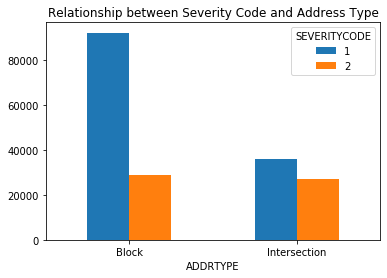

In [83]:
df_addr_type.groupby(['ADDRTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Severity Code and Address Type")
plt.xticks(rotation=0)
plt.show()

### Relationship Between Severity Code and Driving Under Influence

The expectation is that driving under the influence of alcohol or drugs will most likely result in a car accident; however, the dataset shows otherwise. There were more accidents where the driver is not under the influence of alcohol nor drugs. 

In [84]:
df_under_influence = df_clean[['SEVERITYCODE', 'UNDERINFL']]
df_under_influence.head()

,SEVERITYCODE,UNDERINFL
0,2,N
1,1,N
2,1,N
3,1,N
4,2,N


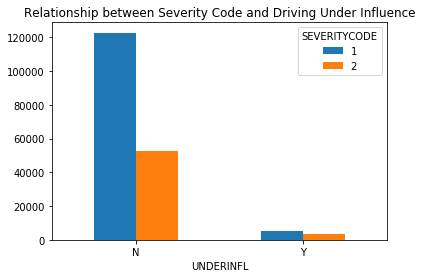

In [85]:
df_under_influence.groupby(['UNDERINFL','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Severity Code and Driving Under Influence")
plt.xticks(rotation=0)
plt.show()

### Relationship Between Light Condition and Driving Under Influence

To understand why there were more accidents while the driver is not under the influence of alcohol or drugs, I check the relationship between the light condition and driving under influence. It is expected that drivers tend to not drink during the day; the dataset shows that many accidents occurred during the day.

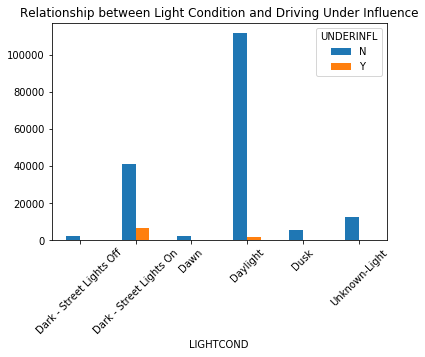

In [86]:
df_light_infl = df_clean[['LIGHTCOND','UNDERINFL']]
df_light_infl.groupby(['LIGHTCOND','UNDERINFL']).size().unstack().plot(kind='bar')
plt.title("Relationship between Light Condition and Driving Under Influence")
plt.xticks(rotation=45)
plt.show()

### Relationship Between Severity Code and Light Condition

Since most people drive during the day, it is expected that there would be more accidents during the day. Looking at the map, accidents tend to concentrate north of the International District; therefore, during the night, recorded accidents will most likely occur where there are streetlights. 

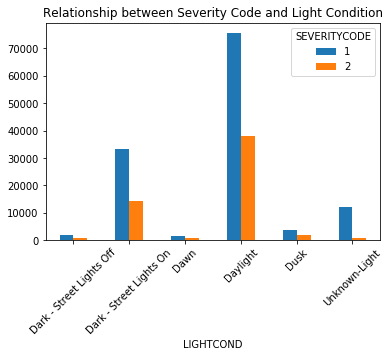

In [87]:
df_light = df_clean[['SEVERITYCODE','LIGHTCOND']]
df_light.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Severity Code and Light Condition")
plt.xticks(rotation=45)
plt.show()

### Relationship Between Severity Code and Weather

It is expected that there would be more accidents in clear skies since drivers tend to be more cautious when driving in the rain. More accidents are recorded while the weather was clear. Both severity codes were prevalent when the weather was clear with raining as the second most prevalent weather for car accidents.

In [88]:
df_weather = df_clean[['SEVERITYCODE', 'WEATHER']]
df_weather.head()

,SEVERITYCODE,WEATHER
0,2,Cloudy
1,1,Raining
2,1,Cloudy
3,1,Clear
4,2,Raining


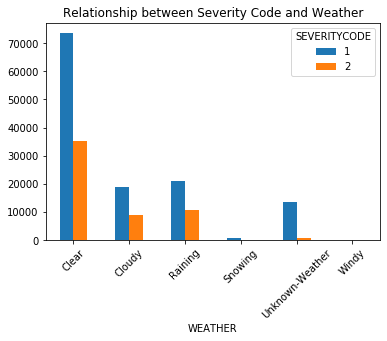

In [89]:
df_weather.groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Severity Code and Weather")
plt.xticks(rotation=45)
plt.show()

### Relationship Between Severity Code and Road Condition

Since the weather shows that there are more accidents when the weather is clear, it is expected that there are more accidents while the road conditions are dry. There were more accidents when the road conditions were dry while wet roads was the second most prevalent. Dirt and oil had barely any car accidents.

In [90]:
df_road = df_clean[['SEVERITYCODE','ROADCOND']]
df_road.head()

,SEVERITYCODE,ROADCOND
0,2,Wet
1,1,Wet
2,1,Dry
3,1,Dry
4,2,Wet


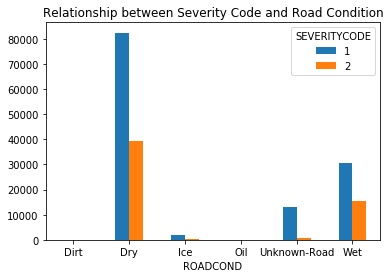

In [91]:
df_road.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Severity Code and Road Condition")
plt.xticks(rotation=0)
plt.show()

### Relationship Between Severity and Hitting a Parked Car

Car accidents are expected to occur between two moving vehicles or property damage. There would be more accidents without a parked car. If there were a parked car, the severity code would most likely by Code 1 since it is an accident involving property damage.

SEVERITYCODE HITPARKEDCAR
0             2            N
1             1            N
2             1            N
3             1            N
4             2            N


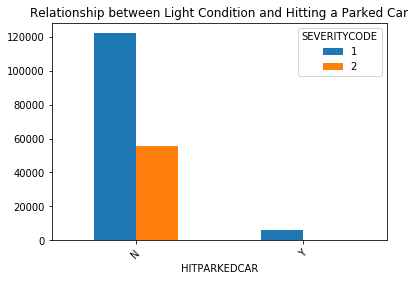

In [92]:
df_parked = df_clean[['SEVERITYCODE','HITPARKEDCAR']]
print(df_parked.head())
df_parked.groupby(['HITPARKEDCAR','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Light Condition and Hitting a Parked Car")
plt.xticks(rotation=45)
plt.show()

### Relationship between Severity Code and Season

Previously, the incident date was recategorized to incident season because going through each incident date is impractical. However, the expectation is that season might not have any correlation with severity code. The seasons showed that the amount of car accidents is almost similar to each other; therefore, the season will be dropped during the model evaluation.

In [93]:
df_season = df_clean[['SEVERITYCODE', 'INCDATE']]
df_season['INCDATE']=df_season['INCDATE'].dt.month
df_season.head()

,SEVERITYCODE,INCDATE
0,2,3
1,1,12
2,1,11
3,1,3
4,2,1


In [94]:
df_season['INCDATE'] = (df_season['INCDATE']%12 + 3)//3
df_season['INCDATE'].replace([1,2,3,4], ['Winter', 'Spring', 'Summer', 'Fall'], inplace=True)
df_season.rename(columns={'INCDATE':'SEASON'},inplace=True)
df_season.head()

,SEVERITYCODE,SEASON
0,2,Spring
1,1,Winter
2,1,Fall
3,1,Spring
4,2,Winter


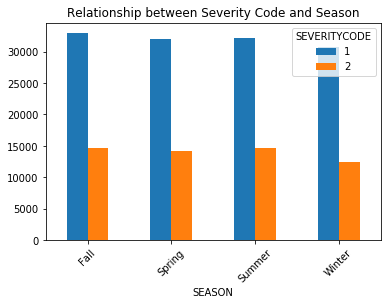

In [95]:
df_season.groupby(['SEASON','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.title("Relationship between Severity Code and Season")
plt.xticks(rotation=45)
plt.show()

### State Collision Number and SDOT Collision Number

The state collision number is the collision code that describes a collision categorically between the numbers 0 to 84. While there are collision codes that are rarely used, we cannot ignore them since the code describes the collision; therefore, they cannot be labeled as outliers. Code 32 is the most prominent and code 10 is the second most prominent. Code 32 and 10 states that a bicycle was damaged, and a car entered at an angle, respectively.

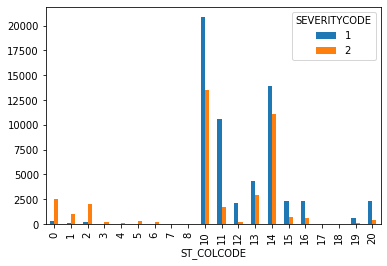

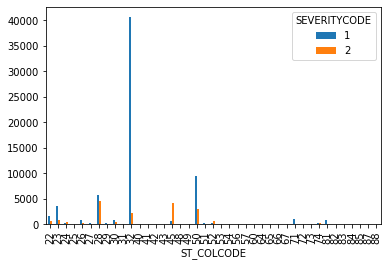

In [96]:
df_sdot = df_clean[['SEVERITYCODE','ST_COLCODE']]
df_sdot['ST_COLCODE'] = df_sdot['ST_COLCODE'].astype('int')
df_sdot.groupby(['ST_COLCODE', 'SEVERITYCODE']).size().unstack()[:20].plot(kind='bar')
df_sdot.groupby(['ST_COLCODE', 'SEVERITYCODE']).size().unstack()[21:].plot(kind='bar')

The SDOT collision number describes the direction of the impact between a vehicle and a pedestrian (both walkers and cyclist). For example, if the code is 11, then the direction of travel is north before and after the collision. Looking at Figure 13, code 51 means a cyclist was hit head on which is a severity code 2 incident. 

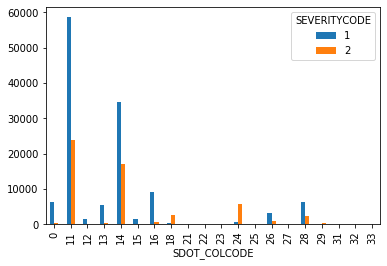

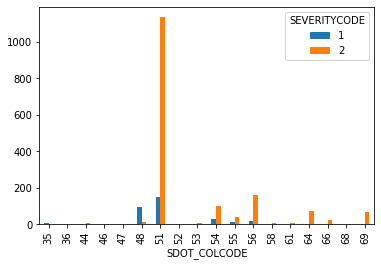

In [97]:
df_st = df_clean[['SEVERITYCODE','SDOT_COLCODE']]
df_st['SDOT_COLCODE'] = df_st['SDOT_COLCODE'].astype('int')
df_st.groupby(['SDOT_COLCODE', 'SEVERITYCODE']).size().unstack()[:20].plot(kind='bar')
df_st.groupby(['SDOT_COLCODE', 'SEVERITYCODE']).size().unstack()[21:].plot(kind='bar')

# Predictive Modeling <a href="modeling"></a>

## Feature Set

After analyzing the data, I decide to drop the seasonal feature because it did not show any correlation between severity code and season. The dataset now consists of 184,146 samples and 8 features with the severity code as the target variable. 

In [98]:
df_clean.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INCDATE', 'SDOT_COLCODE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'HITPARKEDCAR'],
      dtype='object')

In [99]:
features = ['ADDRTYPE','SDOT_COLCODE',
            'UNDERINFL','WEATHER', 'ROADCOND',
            'LIGHTCOND', 'ST_COLCODE',
            'HITPARKEDCAR']
y = df_clean['SEVERITYCODE']
X = df_clean[features]
print(X.shape)
X.head(20)

(184146, 8)


,ADDRTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,Intersection,11,N,Cloudy,Wet,Daylight,10,N
1,Block,16,N,Raining,Wet,Dark - Street Lights On,11,N
2,Block,14,N,Cloudy,Dry,Daylight,32,N
3,Block,11,N,Clear,Dry,Daylight,23,N
4,Intersection,11,N,Raining,Wet,Daylight,10,N
5,Intersection,11,N,Clear,Dry,Daylight,10,N
6,Intersection,11,N,Raining,Wet,Daylight,10,N
7,Intersection,51,N,Clear,Dry,Daylight,5,N
8,Block,11,N,Clear,Dry,Daylight,32,N
9,Intersection,11,N,Clear,Dry,Daylight,10,N


## Imbalance Dataset and Machine Learning Model

Looking at the data analysis, the dataset shows evidence that there are more code 1 samples than code 2 samples. This dataset is known as an imbalance dataset. If a machine learning model were to be fitted by this dataset, then the model will almost always predict code 1. This problem can cause is evident of overfitting with another dataset is being used for evaluation.

To solve this problem, there are three common methods to use: downsample the majority class, upsample the minority class, and use a tree classifier. Downsampling the majority class reduces the size of the majority class to match the size of the minority class. Upsampling the minority class increases the size of the minority class to match the size of the majority class. Using a tree classifier considers all the weights of each feature to help accurately determine the target class. 

For this project, I will compare the performance of a random tree classifier and logistic regression using a downsampled dataset. A random tree classifier is a bundle of decision tree classifiers that uses averaging to improve its accuracy and prevent overfitting. A logistic regression is a model that determines the probability of two classes like pass/fail or win/lose. 


### Model Development

To help ease the development of each model, I used sklearn’s pipeline feature. Sklearn’s pipeline sequentially applies a list of transformations which makes the development more organized. The final step is the fitting the final estimator which is either the random tree classifier or the logistic regressor to the training dataset.

## Importing Sklearn for ML model development

In [100]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression

## Creating a Random Forest Classifier Pipeline

Before fitting the dataset to the model, I needed to transform some variables into numerical values since the model cannot fit strings or text. For SDOT and state collision codes, I did not change their data type since it is already numerical. For the other features, I used one-hot encoding. One-hot encoding uses a binary variable for each unique integer variable. For example if a variable is green out of the following list: \[red, green, blue\], one-hot encoding will transform the variable into the following list; \[0,1,0\].

In [101]:
cat_one_hot = ['ADDRTYPE', 'UNDERINFL',
                'WEATHER', 'ROADCOND', 'LIGHTCOND',
                'HITPARKEDCAR']

cat_transformer = Pipeline(steps=[('OneHot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_one_hot)], remainder='passthrough')

severity_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('Random Forest', RandomForestClassifier(random_state=0))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

print("X Train: {}, X Test: {}".format(X_train.shape, X_test.shape))
print("y Train: {}, y Test: {}".format(y_train.shape, y_test.shape))               

X Train: (147316, 8), X Test: (36830, 8)
y Train: (147316,), y Test: (36830,)


## Model Performance Results

The cross vaidation helps to avoid overfitting in th dataset. If the cross validation is below 0.5, the model is most likely overfitting

In [102]:
print("Fitting Model...")
severity_pipeline.fit(X_train,y_train)
print("Finished!")

print('Cross validation score (Random Forest): {:.3f}'.format(cross_val_score(severity_pipeline, X_train, y_train).mean()))

Fitting Model...
Finished!
Cross validation score (Random Forest): 0.743


As the metrics, I used the accuracy score, recall score, precision, F1-score, and support. 
* The accuracy score is the accuracy between the true target class compared to the respective predicted class.
* The recall score is the performance score of finding the positive sample. 
* The precision score is the performance score of not labeling a true negative sample a positive sample.
* The F1-score is the harmonic mean between precision and recall where 1 is the best. 
* Last, support is the number of occurrences of each class in true class variable. 

In [103]:
y_pred = severity_pipeline.predict(X_test)
print("Accuracy Score (Random Forest): {:.3f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy Score (Random Forest): 0.747
              precision    recall  f1-score   support

           1       0.74      0.97      0.84     25701
           2       0.77      0.23      0.35     11129

    accuracy                           0.75     36830
   macro avg       0.76      0.60      0.60     36830
weighted avg       0.75      0.75      0.69     36830

[[24943   758]
 [ 8572  2557]]


The AUC of the ROC curve is 0.77 meaning that the random tree classifier has good separability. Good separability means that the model can predict class variable accurately.

Text(0.5, 1.0, 'ROC Curve of Random Tree Classifier')

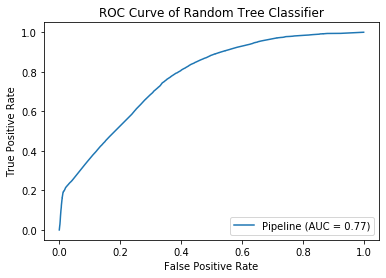

In [104]:
plot_roc_curve(severity_pipeline, X_test, y_test)
plt.title('ROC Curve of Random Tree Classifier')

## Fixing the imbalanced dataset then Evaluation

In [105]:
from sklearn.utils import resample

Downsampling the majority class can fix imbalanced dataset. To downsample the majority class do the following process:
* Separate the major and minority class
* Match the majority class size with the minority class size
* Combine the datesets together

In [106]:
# Separate the Majority and Minority Data
df_majority = df_clean[df_clean.SEVERITYCODE == 1]
df_minority = df_clean[df_clean.SEVERITYCODE == 2]

# Check the shape of both majority and miniroty classes
print("Majority : {}, Minority: {}".format(df_majority.shape, df_minority.shape))

# Downsample to the shape of the minority class
df_majority_downsampled = resample(df_majority, replace=False,
                                   n_samples=56013, random_state = 0)

# Combine the two classes together
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.SEVERITYCODE.value_counts()

Majority : (128146, 12), Minority: (56000, 12)


1    56013
2    56000
Name: SEVERITYCODE, dtype: int64

In [107]:
features = ['ADDRTYPE','SDOT_COLCODE',
            'UNDERINFL','WEATHER', 'ROADCOND',
            'LIGHTCOND', 'ST_COLCODE',
            'HITPARKEDCAR']
y = df_downsampled['SEVERITYCODE']
X = df_downsampled[features]
print(X.shape)
X.head(20)

(112013, 8)


,ADDRTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
114543,Intersection,26,N,Clear,Dry,Dark - Street Lights On,50,N
13361,Block,14,N,Cloudy,Dry,Dusk,13,N
149139,Block,14,N,Cloudy,Wet,Dusk,14,N
9986,Block,14,N,Clear,Dry,Daylight,13,N
164246,Block,11,N,Cloudy,Wet,Dark - Street Lights On,11,N
18096,Block,11,N,Snowing,Wet,Dark - Street Lights On,32,N
124269,Block,14,N,Raining,Wet,Daylight,13,N
81105,Block,28,N,Clear,Dry,Dark - Street Lights On,50,N
48800,Block,11,N,Raining,Wet,Dark - Street Lights On,21,N
48217,Block,14,N,Clear,Dry,Daylight,14,N


In [108]:
cat_one_hot = ['ADDRTYPE', 'UNDERINFL',
                'WEATHER', 'ROADCOND', 'LIGHTCOND',
                'HITPARKEDCAR']

cat_transformer = Pipeline(steps=[('OneHot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_one_hot)], remainder='passthrough')

logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('Logistic Regression', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

print("X Train: {}, X Test: {}".format(X_train.shape, X_test.shape))
print("y Train: {}, y Test: {}".format(y_train.shape, y_test.shape)) 

X Train: (89610, 8), X Test: (22403, 8)
y Train: (89610,), y Test: (22403,)


In [109]:
print("Fitting Model...")
logistic_pipeline.fit(X_train,y_train)
print("Finished!")

print('Cross validation score (LR): {:.3f}'.format(cross_val_score(logistic_pipeline, X_train, y_train).mean()))

Fitting Model...
Finished!
Cross validation score (LR): 0.653


In [110]:
y_pred_logistic = logistic_pipeline.predict(X_test)
print("Accuracy Score (LR): {:.3f}".format(accuracy_score(y_test, y_pred_logistic)))
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy Score (LR): 0.649
              precision    recall  f1-score   support

           1       0.66      0.61      0.63     11221
           2       0.64      0.69      0.66     11182

    accuracy                           0.65     22403
   macro avg       0.65      0.65      0.65     22403
weighted avg       0.65      0.65      0.65     22403

[[6823 4398]
 [3468 7714]]


The AUC of the ROC curver is lower than the random tree classifier, but the AUC is still higher than 0.50 meaning the logistic regression has good separatiblity.

Text(0.5, 1.0, 'ROC Curve of Logistic Regression')

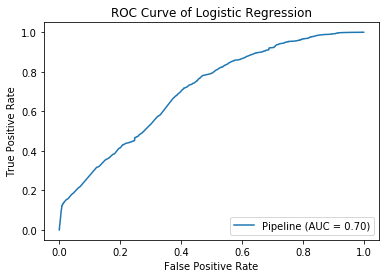

In [111]:
plot_roc_curve(logistic_pipeline, X_test, y_test)
plt.title('ROC Curve of Logistic Regression')

# Results and Discussions <a href="results"></a>

The random tree classifier contains interesting results, the low recall score for severity code 2 shows with an imbalanced data set, the tree was not able to label code 2 accurately but shows that the tree classifier can predict code 1 more accurately than code 2. Looking at the two ROC curves, the AUC for the random tree classifier is higher than the logistic regression meaning the random tree classifier is better in predicting the class variables than the logistic regression. This result can also be interpreted as the measure of separability for the random tree is better than the logistic regression. Fortunately, since the AUC in both models is above 0.5, the models have good separability.

The logistic regression model had a better classification report than the random tree classifier. Based on the classification report for code 2, the logistic regression can more accurately predict class 2 compared to the random tree classifier. This finding could be evidence that the random tree classifier has an overfitting problem, but more evaluation with a different dataset is required to confirm that finding.


# Conclusion <a href="conclusion"></a>

In this project, I analyzed the relationship between the severity code and the features given in the dataset. I used address type, SDOT collision number, state collision number, alcohol or drug usage, weather, road condition, light condition, and parked car collision to determine the severity code of a car accident. I built a random tree classifier using an imbalanced dataset and a logistic regression model using a downsampled dataset. While the random tree classifier had a higher accuracy score than the logistic regression model, both models worked well. More improvements can be made by adding in more features that can determine the severity code of a car accident. For example, speeding is a common cause of car accidents which can be an influential feature for predicting severity code. Overall, the analysis of data and model evaluation showed that the predicting car accident severity is possible for real world use.